In [1]:
import numpy               as np
import pandas              as pd
import h5py                as h5py
import matplotlib.pyplot   as plt
import torch
import torch.nn            as nn
import torch.nn.functional as F
import pickle

from matplotlib import cm
from matplotlib import colors
from matplotlib.image import NonUniformImage


import os.path
#from   os              import path
from   IPython.display import clear_output
from   numpy.random    import seed
from   sklearn.utils   import shuffle

np.set_printoptions(precision = 5)

devCPU = torch.device("cpu")
dev    = devCPU

from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard
from torch.utils.data import DataLoader, Dataset


plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"]     = 200

In [5]:
file = '../../Data/N30_distEij_db_v1.hdf5'
state='/original/A/'
N='N30/'
category='homopolymer/'
fname='eij_mat'

Eij_homopolymer = np.array( pd.read_hdf(file, state+N+category+fname ) )

Eij_homopolymer = Eij_homopolymer[1:, :]

fname='rowij_mat'
rowij_homopolymer = np.array( pd.read_hdf(file, state+N+category+fname ) )

rowij_homopolymer = rowij_homopolymer [1:, :]

shuffleIdx = shuffle(np.arange(Eij_homopolymer.shape[0]))
Eij_homopolymer    = Eij_homopolymer[shuffleIdx]
rowij_homopolymer  = rowij_homopolymer[shuffleIdx]

Seq            = 10
Eij_Train_1    = Eij_homopolymer[:Seq, :]
rowij_Train_1  = rowij_homopolymer[:Seq,:]

print(Eij_Train_1 [:,:])
print(rowij_Train_1 [:,:])


Eij_Test_1    = Eij_homopolymer[Seq:, :]
rowij_Test_1  = rowij_homopolymer[Seq:, :]

print(Eij_Test_1 [:,:])

X1_Test_1 = torch.from_numpy(Eij_Test_1).float()
Y1_Test_1 = torch.from_numpy(rowij_Test_1).float()

[[0.2 0.2 0.2 ... 0.2 0.2 0.2]
 [0.8 0.8 0.8 ... 0.8 0.8 0.8]
 [0.6 0.6 0.6 ... 0.6 0.6 0.6]
 ...
 [0.9 0.9 0.9 ... 0.9 0.9 0.9]
 [1.1 1.1 1.1 ... 1.1 1.1 1.1]
 [1.5 1.5 1.5 ... 1.5 1.5 1.5]]
[[0.      1.00145 0.9969  ... 0.      0.      0.     ]
 [0.      0.99409 0.9945  ... 0.      0.      0.     ]
 [0.      0.99561 0.99035 ... 0.      0.      0.     ]
 ...
 [0.      0.99768 0.99031 ... 0.      0.      0.     ]
 [0.      0.99057 0.9796  ... 0.      0.      0.     ]
 [0.      0.97132 0.9388  ... 0.      0.      0.     ]]
[[0.4 0.4 0.4 ... 0.4 0.4 0.4]
 [1.  1.  1.  ... 1.  1.  1. ]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [1.3 1.3 1.3 ... 1.3 1.3 1.3]]


In [6]:
###############################################################

###file = 'N30_dist_eij_database.hdf5'
state='/original/A/'
N='N30/'
category='fullyrandom/'
fname='eij_mat'

Eij_fullyrandompolymer_A = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fullyrandompolymer_A = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx = shuffle(np.arange(Eij_fullyrandompolymer_A.shape[0]))
Eij_fullyrandompolymer_A    = Eij_fullyrandompolymer_A[shuffleIdx]
rowij_fullyrandompolymer_A  = rowij_fullyrandompolymer_A[shuffleIdx]

Seq            = 50
Eij_Train_5    = Eij_fullyrandompolymer_A[:Seq, :]
rowij_Train_5  = rowij_fullyrandompolymer_A[:Seq,:]

print(Eij_Train_5 [:5,:10])
print(rowij_Train_5 [:,:])

Eij_Test_5    = Eij_fullyrandompolymer_A[Seq:, :]
rowij_Test_5  = rowij_fullyrandompolymer_A[Seq:, :]

print(Eij_Test_5 [:5,:10])

X1_Test_5 = torch.from_numpy(Eij_Test_5).float()
Y1_Test_5 = torch.from_numpy(rowij_Test_5).float()

[[0.88893 1.13002 0.82502 0.65389 0.96782 0.39219 0.3378  0.4063  0.75597
  0.14948]
 [1.109   1.08737 0.04818 0.9514  0.70861 0.21328 0.51908 1.42559 0.78203
  0.50486]
 [0.07746 0.76718 1.08048 1.33837 0.09235 0.99206 1.15467 0.37455 0.98786
  0.1814 ]
 [0.33618 0.23281 0.36604 1.44897 0.25939 0.08917 0.57101 0.89505 0.14249
  0.22388]
 [0.5634  1.31875 1.04004 0.02796 1.49981 0.26927 0.02797 0.12199 0.96269
  0.24133]]
[[0.      0.99993 0.9941  ... 0.      0.      0.     ]
 [0.      1.00093 0.99395 ... 0.      0.      0.     ]
 [0.      1.00204 0.99735 ... 0.      0.      0.     ]
 ...
 [0.      0.99939 0.99089 ... 0.      0.      0.     ]
 [0.      1.00324 1.00042 ... 0.      0.      0.     ]
 [0.      0.99911 0.99576 ... 0.      0.      0.     ]]
[[0.42671 0.48646 0.27944 0.36147 1.40493 0.73232 1.09158 0.61069 0.19703
  0.63167]
 [1.33933 1.46924 0.65849 0.83374 0.11467 1.20255 1.486   1.09704 0.78818
  0.29178]
 [1.03318 0.10664 1.21407 1.14967 0.71236 0.61341 0.36129 1.36874 1.

In [4]:
#file = 'N30_dist_eij_database.hdf5'
state='/original/A/'
N='N30/'
category='fourierpolymers/'
fname='eij_mat'

Eij_fourierpolymer_A = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_A = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx = shuffle(np.arange(Eij_fourierpolymer_A.shape[0]))
Eij_fourierpolymer_A    = Eij_fourierpolymer_A[shuffleIdx]
rowij_fourierpolymer_A  = rowij_fourierpolymer_A[shuffleIdx]

Seq            = 50
Eij_Train_6    = Eij_fourierpolymer_A[:Seq, :]
rowij_Train_6  = rowij_fourierpolymer_A[:Seq,:]

print(Eij_Train_6 [:5,:])
print(rowij_Train_6 [:,:])

Eij_Test_6    = Eij_fourierpolymer_A[Seq:, :]
rowij_Test_6  = rowij_fourierpolymer_A[Seq:, :]

print(Eij_Test_6 [:5,:])

X1_Test_6 = torch.from_numpy(Eij_Test_6).float()
Y1_Test_6 = torch.from_numpy(rowij_Test_6).float()

[[1.4757  1.48055 1.47608 ... 0.38031 0.43558 0.48812]
 [0.99799 0.92705 0.85202 ... 0.75985 0.78882 0.81433]
 [0.50092 0.71393 0.90899 ... 0.43008 0.43026 0.41964]
 [0.62989 0.61271 0.59378 ... 0.42532 0.49265 0.55858]
 [0.88191 0.94608 1.0075  ... 0.02484 0.02405 0.02318]]
[[0.      0.99127 0.98429 ... 0.      0.      0.     ]
 [0.      0.99075 0.99274 ... 0.      0.      0.     ]
 [0.      0.99548 0.98902 ... 0.      0.      0.     ]
 ...
 [0.      0.99539 0.99559 ... 0.      0.      0.     ]
 [0.      0.99774 0.99434 ... 0.      0.      0.     ]
 [0.      0.99719 0.99661 ... 0.      0.      0.     ]]
[[0.2056  0.13976 0.07163 ... 0.09744 0.05636 0.20924]
 [1.20549 1.20256 1.18592 ... 1.11906 1.14793 1.1637 ]
 [0.91496 1.0101  1.08956 ... 1.29879 1.37856 1.43693]
 [0.75716 0.68704 0.61218 ... 1.49559 1.49995 1.49395]
 [0.44072 0.47204 0.34804 ... 1.37403 1.47168 1.08511]]


In [7]:
###############################################################
file = '../../Data/N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_1/'

fname='eij_mat'
Eij_fourierpolymer_1 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_1 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx = shuffle(np.arange( Eij_fourierpolymer_1.shape[0] ))
Eij_fourierpolymer_1    = Eij_fourierpolymer_1[shuffleIdx]
rowij_fourierpolymer_1  = rowij_fourierpolymer_1[shuffleIdx]

Seq            = 50
Eij_Train_7    = Eij_fourierpolymer_1[:Seq, :]
rowij_Train_7  = rowij_fourierpolymer_1[:Seq,:]

print(Eij_Train_7 [:5,:])
print(rowij_Train_7 [:,:])

Eij_Test_7     = Eij_fourierpolymer_1[Seq:, :]
rowij_Test_7   = rowij_fourierpolymer_1[Seq:, :]

X1_Test_7 = torch.from_numpy(Eij_Test_7).float()
Y1_Test_7 = torch.from_numpy(rowij_Test_7).float()

[[0.02398 0.09623 0.1659  ... 1.76125 1.7491  1.69023]
 [0.93035 1.11321 1.27794 ... 1.46411 1.37279 1.2591 ]
 [1.08001 1.13826 1.18111 ... 1.18111 1.02882 0.86262]
 [0.74416 0.81385 0.87496 ... 0.88428 0.82065 0.74838]
 [1.42976 1.38797 0.60514 ... 0.44632 1.24689 1.38174]]
[[0.      0.99529 0.99352 ... 0.      0.      0.     ]
 [0.      0.98918 0.98407 ... 0.      0.      0.     ]
 [0.      0.99437 0.98484 ... 0.      0.      0.     ]
 ...
 [0.      0.99567 0.98897 ... 0.      0.      0.     ]
 [0.      1.00156 0.99931 ... 0.      0.      0.     ]
 [0.      1.00296 0.99836 ... 0.      0.      0.     ]]


In [8]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_2/'

fname='eij_mat'
Eij_fourierpolymer_2 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_2 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx = shuffle(np.arange( Eij_fourierpolymer_2.shape[0] ))
Eij_fourierpolymer_2    = Eij_fourierpolymer_2[shuffleIdx]
rowij_fourierpolymer_2  = rowij_fourierpolymer_2[shuffleIdx]

#Seq            = 25
Eij_Train_8    = Eij_fourierpolymer_2[:Seq, :]
rowij_Train_8  = rowij_fourierpolymer_2[:Seq,:]

print(Eij_Train_8 [:5,:])
print(rowij_Train_8 [:,:])

Eij_Test_8     = Eij_fourierpolymer_2[Seq:, :]
rowij_Test_8   = rowij_fourierpolymer_2[Seq:, :]

X1_Test_8 = torch.from_numpy(Eij_Test_8).float()
Y1_Test_8 = torch.from_numpy(rowij_Test_8).float()

[[1.78116 1.86438 1.93622 ... 0.16541 0.18169 0.19687]
 [1.13978 1.19221 1.24129 ... 1.16645 1.1169  1.06422]
 [0.0209  0.02042 0.01957 ... 0.68794 0.82298 0.94242]
 [0.67895 0.86337 1.03501 ... 1.07417 0.93456 0.78111]
 [0.51829 0.62513 0.72389 ... 0.7393  0.61485 0.48245]]
[[0.      0.98483 0.96314 ... 0.      0.      0.     ]
 [0.      0.96836 0.93271 ... 0.      0.      0.     ]
 [0.      1.00426 1.00952 ... 0.      0.      0.     ]
 ...
 [0.      0.99039 0.97707 ... 0.      0.      0.     ]
 [0.      0.98726 0.98525 ... 0.      0.      0.     ]
 [0.      0.98304 0.97743 ... 0.      0.      0.     ]]


In [9]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_3/'

fname='eij_mat'
Eij_fourierpolymer_3 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_3 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx = shuffle(np.arange( Eij_fourierpolymer_3.shape[0] ))
Eij_fourierpolymer_3    = Eij_fourierpolymer_3[shuffleIdx]
rowij_fourierpolymer_3  = rowij_fourierpolymer_3[shuffleIdx]

#Seq            = 25
Eij_Train_9    = Eij_fourierpolymer_3[:Seq, :]
rowij_Train_9  = rowij_fourierpolymer_3[:Seq,:]

print(Eij_Train_9 [:5,:])
print(rowij_Train_9 [:,:])

Eij_Test_9     = Eij_fourierpolymer_3[Seq:, :]
rowij_Test_9   = rowij_fourierpolymer_3[Seq:, :]

X1_Test_9 = torch.from_numpy(Eij_Test_9).float()
Y1_Test_9 = torch.from_numpy(rowij_Test_9).float()

[[0.98993 0.95351 0.91356 ... 1.28318 1.3208  1.35353]
 [2.0268  1.98828 1.93926 ... 1.00116 1.08089 1.15492]
 [0.02014 0.04674 0.07231 ... 1.76184 1.91823 2.03176]
 [0.06502 0.04884 0.16255 ... 0.88358 0.77266 0.65945]
 [1.29754 1.50762 1.68202 ... 1.66509 1.48928 1.27822]]
[[0.      0.98887 0.98313 ... 0.      0.      0.     ]
 [0.      0.98862 0.97918 ... 0.      0.      0.     ]
 [0.      1.00206 0.997   ... 0.      0.      0.     ]
 ...
 [0.      0.99527 0.99465 ... 0.      0.      0.     ]
 [0.      0.99328 0.98738 ... 0.      0.      0.     ]
 [0.      1.00155 0.99741 ... 0.      0.      0.     ]]


In [17]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_4/'

fname='eij_mat'
Eij_fourierpolymer_4 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_4 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_4.shape[0] ))
Eij_fourierpolymer_4    = Eij_fourierpolymer_4[shuffleIdx]
rowij_fourierpolymer_4  = rowij_fourierpolymer_4[shuffleIdx]

#Seq             = 25
Eij_Train_10    = Eij_fourierpolymer_4[:Seq, :]
rowij_Train_10  = rowij_fourierpolymer_4[:Seq,:]

print(Eij_Train_10 [:5,:])
print(rowij_Train_10 [:,:])

Eij_Test_10     = Eij_fourierpolymer_4[Seq:, :]
rowij_Test_10   = rowij_fourierpolymer_4[Seq:, :]

X1_Test_10      = torch.from_numpy(Eij_Test_10).float()
Y1_Test_10      = torch.from_numpy(rowij_Test_10).float()

[[1.40796 1.63254 1.83177 ... 2.27297 2.31066 2.31249]
 [0.14446 0.09995 0.31757 ... 1.88024 1.45325 0.63687]
 [0.06775 0.27371 0.40634 ... 0.91402 0.86975 0.59243]
 [1.4086  1.68167 1.92448 ... 2.04209 1.82822 1.58145]
 [1.9286  1.75822 1.50448 ... 2.3416  2.13807 1.83318]]
[[0.      0.98013 0.94874 ... 0.      0.      0.     ]
 [0.      0.99811 0.99408 ... 0.      0.      0.     ]
 [0.      0.99227 0.9942  ... 0.      0.      0.     ]
 ...
 [0.      1.00812 1.00284 ... 0.      0.      0.     ]
 [0.      0.99598 0.98468 ... 0.      0.      0.     ]
 [0.      1.00322 0.99787 ... 0.      0.      0.     ]]


In [11]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_5/'

fname='eij_mat'
Eij_fourierpolymer_5 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_5 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_5.shape[0] ))
Eij_fourierpolymer_5    = Eij_fourierpolymer_5[shuffleIdx]
rowij_fourierpolymer_5  = rowij_fourierpolymer_5[shuffleIdx]

#Seq             = 25
Eij_Train_11    = Eij_fourierpolymer_5[:Seq, :]
rowij_Train_11  = rowij_fourierpolymer_5[:Seq,:]

print(Eij_Train_11 [:5,:])
print(rowij_Train_11 [:,:])

Eij_Test_11     = Eij_fourierpolymer_5[Seq:, :]
rowij_Test_11   = rowij_fourierpolymer_5[Seq:, :]

X1_Test_11      = torch.from_numpy(Eij_Test_11).float()
Y1_Test_11      = torch.from_numpy(rowij_Test_11).float()

[[1.27868 1.30278 1.31916 ... 0.50113 0.43413 0.36455]
 [1.62709 1.44772 1.25803 ... 1.59209 1.7564  1.9082 ]
 [1.88636 1.7913  1.69004 ... 0.72867 0.83258 0.93362]
 [0.1336  0.21848 0.30131 ... 0.08229 0.03722 0.0082 ]
 [0.08384 0.16092 0.40384 ... 0.20144 0.19473 0.1858 ]]
[[0.      0.99102 0.98482 ... 0.      0.      0.     ]
 [0.      0.97386 0.9503  ... 0.      0.      0.     ]
 [0.      0.98542 0.9849  ... 0.      0.      0.     ]
 ...
 [0.      0.97009 0.94794 ... 0.      0.      0.     ]
 [0.      0.95384 0.91739 ... 0.      0.      0.     ]
 [0.      0.97869 0.96099 ... 0.      0.      0.     ]]


In [12]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_6/'

fname='eij_mat'
Eij_fourierpolymer_6 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_6 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_6.shape[0] ))
Eij_fourierpolymer_6    = Eij_fourierpolymer_6[shuffleIdx]
rowij_fourierpolymer_6  = rowij_fourierpolymer_6[shuffleIdx]

Seq             = 50
Eij_Train_12    = Eij_fourierpolymer_6[:Seq, :]
rowij_Train_12  = rowij_fourierpolymer_6[:Seq,:]

print(Eij_Train_12 [:5,:])
print(rowij_Train_12 [:,:])

Eij_Test_12     = Eij_fourierpolymer_6[Seq:, :]
rowij_Test_12   = rowij_fourierpolymer_6[Seq:, :]

X1_Test_12      = torch.from_numpy(Eij_Test_12).float()
Y1_Test_12      = torch.from_numpy(rowij_Test_12).float()

[[1.04106 0.96997 0.88826 ... 0.36602 0.6186  0.8644 ]
 [0.27897 0.32676 0.37124 ... 0.16867 0.08983 0.01007]
 [1.16603 1.11493 1.05826 ... 2.26391 2.28745 2.29954]
 [0.01337 0.00355 0.02046 ... 2.60297 2.63802 2.66585]
 [2.052   2.1558  2.25059 ... 0.39432 0.45347 0.51071]]
[[0.      0.99733 0.98362 ... 0.      0.      0.     ]
 [0.      1.00162 0.99741 ... 0.      0.      0.     ]
 [0.      0.98698 0.98239 ... 0.      0.      0.     ]
 ...
 [0.      0.98821 0.97232 ... 0.      0.      0.     ]
 [0.      0.99687 0.99146 ... 0.      0.      0.     ]
 [0.      0.99458 0.99406 ... 0.      0.      0.     ]]


In [13]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_7/'

fname='eij_mat'
Eij_fourierpolymer_7 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_7 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_7.shape[0] ))
Eij_fourierpolymer_7    = Eij_fourierpolymer_7[shuffleIdx]
rowij_fourierpolymer_7  = rowij_fourierpolymer_7[shuffleIdx]

Seq             = 50
Eij_Train_13    = Eij_fourierpolymer_7[:Seq, :]
rowij_Train_13  = rowij_fourierpolymer_7[:Seq,:]

print(Eij_Train_13 [:5,:])
print(rowij_Train_13 [:,:])

Eij_Test_13     = Eij_fourierpolymer_7[Seq:, :]
rowij_Test_13   = rowij_fourierpolymer_7[Seq:, :]

X1_Test_13      = torch.from_numpy(Eij_Test_13).float()
Y1_Test_13      = torch.from_numpy(rowij_Test_13).float()

[[0.04228 0.09    0.15798 ... 0.26609 0.18259 0.03136]
 [2.00178 1.91404 1.7966  ... 1.1742  0.9574  0.72575]
 [2.50572 2.64686 2.58826 ... 0.36963 0.24714 0.106  ]
 [0.53378 0.5574  0.57514 ... 0.35802 0.12398 0.11136]
 [1.73711 0.57847 0.73518 ... 1.14387 0.22453 1.53277]]
[[0.      0.99818 0.99038 ... 0.      0.      0.     ]
 [0.      0.98312 0.97181 ... 0.      0.      0.     ]
 [0.      0.9366  0.89815 ... 0.      0.      0.     ]
 ...
 [0.      0.93744 0.89379 ... 0.      0.      0.     ]
 [0.      1.01054 1.00199 ... 0.      0.      0.     ]
 [0.      0.99741 0.99633 ... 0.      0.      0.     ]]


In [14]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_8/'

fname='eij_mat'
Eij_fourierpolymer_8 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_8 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_8.shape[0] ))
Eij_fourierpolymer_8    = Eij_fourierpolymer_8[shuffleIdx]
rowij_fourierpolymer_8  = rowij_fourierpolymer_8[shuffleIdx]

Seq             = 50
Eij_Train_14    = Eij_fourierpolymer_8[:Seq, :]
rowij_Train_14  = rowij_fourierpolymer_8[:Seq,:]

print(Eij_Train_14 [:5,:])
print(rowij_Train_14 [:,:])

Eij_Test_14     = Eij_fourierpolymer_8[Seq:, :]
rowij_Test_14   = rowij_fourierpolymer_8[Seq:, :]

X1_Test_14      = torch.from_numpy(Eij_Test_14).float()
Y1_Test_14      = torch.from_numpy(rowij_Test_14).float()

[[1.39641 1.34985 1.29336 ... 1.08669 0.83257 0.57233]
 [1.61664 2.25883 2.76132 ... 2.67806 2.13548 1.46083]
 [2.44654 2.55441 2.59403 ... 0.80577 0.70166 0.57881]
 [2.21645 0.41629 2.36102 ... 2.36102 1.83082 2.99686]
 [1.59819 1.43808 1.20376 ... 1.6481  1.14134 0.57569]]
[[0.      0.9843  0.9783  ... 0.      0.      0.     ]
 [0.      0.93521 0.89533 ... 0.      0.      0.     ]
 [0.      0.90728 0.84304 ... 0.      0.      0.     ]
 ...
 [0.      0.96924 0.94294 ... 0.      0.      0.     ]
 [0.      1.0019  0.99101 ... 0.      0.      0.     ]
 [0.      0.99967 1.00056 ... 0.      0.      0.     ]]


In [15]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_9/'

fname='eij_mat'
Eij_fourierpolymer_9 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_9 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_9.shape[0] ))
Eij_fourierpolymer_9    = Eij_fourierpolymer_9[shuffleIdx]
rowij_fourierpolymer_9  = rowij_fourierpolymer_9[shuffleIdx]

Seq             = 50
Eij_Train_15    = Eij_fourierpolymer_9[:Seq, :]
rowij_Train_15  = rowij_fourierpolymer_9[:Seq,:]

print(Eij_Train_15 [:5,:])
print(rowij_Train_15 [:,:])

Eij_Test_15     = Eij_fourierpolymer_9[Seq:, :]
rowij_Test_15   = rowij_fourierpolymer_9[Seq:, :]

X1_Test_15      = torch.from_numpy(Eij_Test_15).float()
Y1_Test_15      = torch.from_numpy(rowij_Test_15).float()

[[1.07422e-01 1.32925e-01 1.57640e-01 ... 1.78174e+00 1.71762e+00
  1.64331e+00]
 [1.57466e+00 1.34291e+00 1.06751e+00 ... 2.26898e+00 1.84111e+00
  1.35339e+00]
 [1.43100e-03 1.94200e-03 2.44600e-03 ... 3.36383e+00 3.37166e+00
  3.36903e+00]
 [1.17211e-01 9.85280e-02 7.94130e-02 ... 3.27565e+00 3.19978e+00
  3.10985e+00]
 [1.70723e+00 1.63363e+00 1.55321e+00 ... 1.82533e+00 1.69938e+00
  1.56632e+00]]
[[0.      0.99787 0.9988  ... 0.      0.      0.     ]
 [0.      0.96883 0.93782 ... 0.      0.      0.     ]
 [0.      1.00396 1.00154 ... 0.      0.      0.     ]
 ...
 [0.      0.8888  0.81629 ... 0.      0.      0.     ]
 [0.      0.98737 0.97064 ... 0.      0.      0.     ]
 [0.      0.93547 0.88194 ... 0.      0.      0.     ]]


In [16]:
###############################################################
#file = 'N30_dist_eij_DB_FP.hdf5'
state='/original/NewData/'
N='N30/'
category='fourierpolymers_10/'

fname='eij_mat'
Eij_fourierpolymer_10 = np.array( pd.read_hdf(file, state+N+category+fname ) )

fname='rowij_mat'
rowij_fourierpolymer_10 = np.array( pd.read_hdf(file, state+N+category+fname ) )

shuffleIdx              = shuffle(np.arange( Eij_fourierpolymer_10.shape[0] ))
Eij_fourierpolymer_10    = Eij_fourierpolymer_10[shuffleIdx]
rowij_fourierpolymer_10  = rowij_fourierpolymer_10[shuffleIdx]

Seq             = 50
Eij_Train_16    = Eij_fourierpolymer_10[:Seq, :]
rowij_Train_16  = rowij_fourierpolymer_10[:Seq,:]

print(Eij_Train_16 [:5,:])
print(rowij_Train_16 [:,:])

Eij_Test_16     = Eij_fourierpolymer_10[Seq:, :]
rowij_Test_16   = rowij_fourierpolymer_10[Seq:, :]

X1_Test_16      = torch.from_numpy(Eij_Test_16).float()
Y1_Test_16      = torch.from_numpy(rowij_Test_16).float()

[[1.82816 1.74997 1.66688 ... 1.78996 1.72831 1.66183]
 [0.77827 1.67065 0.19806 ... 0.19806 0.31787 0.30845]
 [2.73273 2.76503 2.75001 ... 3.01562 3.11205 3.15525]
 [1.51276 1.11074 0.63301 ... 0.29987 0.70273 1.05769]
 [0.68383 0.74819 0.80244 ... 0.80244 0.43901 0.06965]]
[[0.      1.00116 0.99083 ... 0.      0.      0.     ]
 [0.      0.97779 0.95114 ... 0.      0.      0.     ]
 [0.      0.90685 0.8196  ... 0.      0.      0.     ]
 ...
 [0.      0.99017 0.95613 ... 0.      0.      0.     ]
 [0.      0.98049 0.95991 ... 0.      0.      0.     ]
 [0.      0.83957 0.76582 ... 0.      0.      0.     ]]


In [18]:
Eij_Train = np.concatenate((Eij_Train_1, Eij_Train_5,   Eij_Train_6,
                            Eij_Train_7, Eij_Train_8,   Eij_Train_9, Eij_Train_10,
                            Eij_Train_11, Eij_Train_12, Eij_Train_13, Eij_Train_14,
                            Eij_Train_15, Eij_Train_16,), axis= 0)

rowij_Train = np.concatenate((rowij_Train_1, rowij_Train_5, rowij_Train_6,
                              rowij_Train_7, rowij_Train_8,
                              rowij_Train_9, rowij_Train_10,
                              rowij_Train_11, rowij_Train_12,
                              rowij_Train_13, rowij_Train_14,
                              rowij_Train_15, rowij_Train_16,), axis= 0)


Eij_Test = np.concatenate(( Eij_Test_1,  Eij_Test_5,  Eij_Test_6,
                            Eij_Test_7,  Eij_Test_8,
                            Eij_Test_9,  Eij_Test_10,
                            Eij_Test_11, Eij_Test_12,
                            Eij_Test_13, Eij_Test_14,
                            Eij_Test_15, Eij_Test_16, ), axis= 0)

rowij_Test = np.concatenate(( rowij_Test_1,
                              rowij_Test_5,  rowij_Test_6,
                              rowij_Test_7,  rowij_Test_8,
                              rowij_Test_9,  rowij_Test_10,
                              rowij_Test_11, rowij_Test_12,
                              rowij_Test_13, rowij_Test_14,
                              rowij_Test_15, rowij_Test_16,), axis= 0)


#Eij =  np.concatenate((Eij_homopolymer, Eij_GMRpolymer, 
#                       Eij_fullyrandompolymer, Eij_fourierpolymer), axis= 0)

#rowij = np.concatenate((rowij_homopolymer, rowij_GMRpolymer, 
#                        rowij_fullyrandompolymer, rowij_fourierpolymer ), axis= 0)

shuffleIdx = shuffle(np.arange(Eij_Train.shape[0]))
Eij_Train        = Eij_Train[shuffleIdx]
rowij_Train      = rowij_Train[shuffleIdx]

#shuffleIdx = shuffle(np.arange(Eij_Test.shape[0]))
#Eij_Test        = Eij_Test[shuffleIdx]
#rowij_Test      = rowij_Test[shuffleIdx]

#Seq          = 79
#Eij_Train    = Eij[:Seq, :]
#rowij_Train  = rowij[:Seq,:]

#Eij_Test    = Eij[Seq:, :]
#rowij_Test  = rowij[Seq:,:]

print(Eij_Train.shape)
print(rowij_Train.shape)

X1_Train = torch.from_numpy(Eij_Train).float()
Y1_Train = torch.from_numpy(rowij_Train).float()

print(Eij_Test.shape)
print(rowij_Test.shape)

X1_Test = torch.from_numpy(Eij_Test).float()
Y1_Test = torch.from_numpy(rowij_Test).float()

(610, 900)
(610, 900)
(605, 900)
(605, 900)


In [19]:
class XY_Data(Dataset):
    def __init__(self, X, Y):
        #data loading
        self.input   = X
        self.output  = Y
        self.n_samples = X.shape[0]
        
    def __getitem__(self, index):
        # dataset[0]
        return self.input[index], self.output[index]
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
TrainDataset = XY_Data(X1_Train, Y1_Train)

In [20]:
batch_size = 64

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=TrainDataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [28]:
# Hyper-parameters 
#input_size = 784 # 28x28
hidden_size   = 128
num_layers    = 3
# num_classes nothing but target Sequence size
num_classes   = Y1_Train.shape[1]
num_epochs    = 551
learning_rate = 0.0005
l2 = 1e-5
#input_size = 1
#sequence_length = X1_Train.shape[1]

input_size = 30
sequence_length = 30


device = dev

In [29]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers, bias=False, batch_first=True)
        ## x-> (batchsize, seq, input_size)
        #self.fc = nn.Linear(hidden_size, num_classes, bias=False)
        self.fc1 = nn.Linear(hidden_size,   hidden_size*4, bias=False)
        #self.fc2 = nn.Linear(hidden_size*4, hidden_size*4, bias=False)
        self.fc3 = nn.Linear(hidden_size*4, num_classes, bias=False)
        
         
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(device)
        #c0 = torch.zeros(self.num_layers, x.shape[0], self.hidden_size).to(device)
        
        out, h_n = self.gru(x, h0)
        ## out -> (batchsize, seq_length =1, hidden_size)
        ## h_n -> (num_layer, N, hidden_size)
        
        out = out[:, -1, :]
        ## out (batchsize, hidden_size)
        #out = self.fc(out)
        
        out = self.fc1(out)
        #out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [30]:
model = RNN(input_size, hidden_size, num_layers, num_classes)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = l2)

In [31]:
xTrain = X1_Train
yTrain = Y1_Train

mseHistory = list() # loss history

In [32]:
for epoch in range(num_epochs):
    
    
    with torch.no_grad():
            if ( epoch % 10 == 0 ):
                
                xTrain   = xTrain.reshape(-1, sequence_length, input_size).to(device)
                yPred    = model(xTrain)
                M        = yTrain.shape[0]*yTrain.shape[1]
                mseTrain = (yPred - yTrain).pow(2).sum()/M
                
                xTest     = X1_Test_1
                yTest     = Y1_Test_1
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_1 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test_5
                yTest     = Y1_Test_5
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_5 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test_6
                yTest     = Y1_Test_6
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_6 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test_7
                yTest     = Y1_Test_7
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_7 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test_8
                yTest     = Y1_Test_8
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_8 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test_9
                yTest     = Y1_Test_9
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_9 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test_10
                yTest     = Y1_Test_10
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest_10 = (yPred -  yTest).pow(2).sum()/M # mean square
                
                xTest     = X1_Test
                yTest     = Y1_Test
                xTest     = xTest.reshape(-1, sequence_length, input_size).to(device)
                yPred     = model(xTest)
                M         = yTest.shape[0]*yTest.shape[1]
                mseTest = (yPred -  yTest).pow(2).sum()/M # mean square
                
                
                mseRecord = np.array ( ( epoch, float(mseTrain), float(mseTest_1),  
                                float(mseTest_5), float(mseTest_6), float(mseTest_7),
                                float(mseTest_8), float(mseTest_9), 
                                float(mseTest_10), float(mseTest) ) )
                
                print ( "rmse/kT ~", mseRecord[0], np.sqrt(mseRecord[1:] ))
                mseHistory.append(mseRecord)
                
                if ( epoch% 50 == 0 ):
                    
                    print(xTest.shape)
                    print(yTest.shape)
                    print(yPred.shape)
                    
                    xTest = xTest.reshape(-1, sequence_length*input_size)
                    yTest = yTest.reshape(-1, sequence_length*input_size)
                    yPred = yPred.reshape(-1, sequence_length*input_size)
                
                    np_yPred = yPred.cpu().detach().numpy()
                    yPred_DF =pd.DataFrame(np_yPred)
                
                    np_yTest = yTest.cpu().detach().numpy()
                    yTest_DF =pd.DataFrame(np_yTest)
                    
                    #xTest = xTest.squeeze(2)
                    
                    np_xTest = xTest.cpu().detach().numpy()
                    xTest_DF =pd.DataFrame(np_xTest)
                    
                    fname =  './GRU_N30_AB_data.hdf5'
                    path  =  '/N30/test/s50/'
                
                    yPred_DF.to_hdf(fname, path+'P'+str(epoch),mode='a')
                
                    yTest_DF.to_hdf(fname, path+'T'+str(epoch),mode='a')
                    
                    xTest_DF.to_hdf(fname, path+'eij'+str(epoch),mode='a')
                    
                
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [N, seq_length=24]
        # resized: [N,seq_length=1,inputsize=24]
        images = images.reshape(-1, sequence_length, input_size)
        #print(images.shape)
        labels = labels.to(device)
        
        #images = images.double()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #if (i+1) % 100 == 0:
            #print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

DF_msehist =  pd.DataFrame(mseHistory)
DF_msehist.to_hdf('./GRU_N30_mse.hdf5','/N30/s50/test/msehist/',mode='a')

rmse/kT ~ 0.0 [0.53775 0.61321 0.61282 0.6311  0.6075  0.56424 0.54398 0.51864 0.53561]
torch.Size([605, 30, 30])
torch.Size([605, 900])
torch.Size([605, 900])
rmse/kT ~ 10.0 [0.05108 0.05202 0.01241 0.04911 0.03109 0.03632 0.04104 0.0499  0.0521 ]
rmse/kT ~ 20.0 [0.03576 0.06367 0.01113 0.03509 0.02197 0.02484 0.02685 0.03612 0.03701]
rmse/kT ~ 30.0 [0.02999 0.05785 0.00757 0.02589 0.02024 0.02358 0.02539 0.03128 0.03174]
rmse/kT ~ 40.0 [0.02567 0.04447 0.0063  0.02319 0.01773 0.02074 0.02191 0.0266  0.02752]
rmse/kT ~ 50.0 [0.02295 0.03142 0.00688 0.02111 0.01486 0.01807 0.01785 0.02316 0.02506]
torch.Size([605, 30, 30])
torch.Size([605, 900])
torch.Size([605, 900])
rmse/kT ~ 60.0 [0.02155 0.02499 0.00744 0.02007 0.01362 0.0169  0.0163  0.02172 0.02364]
rmse/kT ~ 70.0 [0.02691 0.02307 0.01784 0.0251  0.01828 0.02236 0.02123 0.02793 0.0291 ]
rmse/kT ~ 80.0 [0.02233 0.0271  0.01009 0.01945 0.01782 0.02107 0.0209  0.02298 0.02388]
rmse/kT ~ 90.0 [0.0236  0.02306 0.01312 0.02173 0.01531 

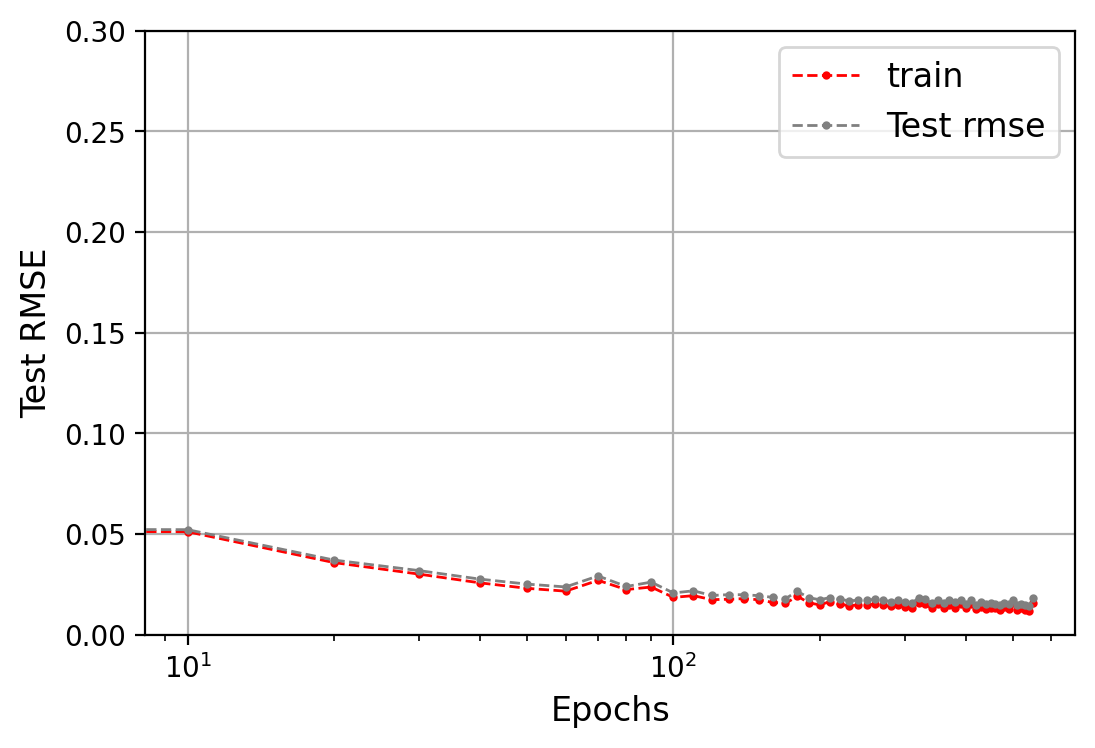

In [34]:
norm = 1.

GRU_combine_AB = pd.read_hdf('./GRU_N30_mse.hdf5','/N30/s50/test/msehist/')

GRU_combine_AB.columns = ['epoch', 'train_mse', 't_1', 't_5', 't_6', 't_7', 't_8', 't_9',
                           't_10', 'test_mse']


#case_N30 = DF_msehist
case_N30 = GRU_combine_AB

case_N30.columns = ['epoch', 'train_mse', 't_1', 't_5', 't_6', 't_7', 't_8', 't_9',
                           't_10', 'test_mse']

plt.figure(1)
plt.xscale("log")
plt.ylim(0.0, 0.3) 
plt.ylabel("Test RMSE", fontsize = 12)
plt.xlabel("Epochs", fontsize = 12)

plt.plot( case_N30['epoch'], np.sqrt(case_N30['train_mse'])*norm, 'r.--',  ms = 4, lw=1., label="train")

plt.plot( case_N30['epoch'], np.sqrt(case_N30['test_mse'])*norm, '.--', color = '0.5',  ms = 4, lw=1., label="Test rmse")


#plt.title("Sequence length include", fontsize=12)
plt.grid()
plt.legend(loc='best',fontsize=12)
plt.savefig("./RMSE_combineAB_s50.png",dpi=300, )

In [36]:
fname =  './GRU_N30_AB_data.hdf5'
path  =  '/N30/test/s50/'

Pred_500 = pd.read_hdf( fname, path+'P550')
Test_500 = pd.read_hdf( fname, path+'T550')

Pred_500 = Pred_500.to_numpy()
Test_500 = Test_500.to_numpy()

print(Pred_500.shape)
print(Test_500.shape)


(605, 900)
(605, 900)


No handles with labels found to put in legend.


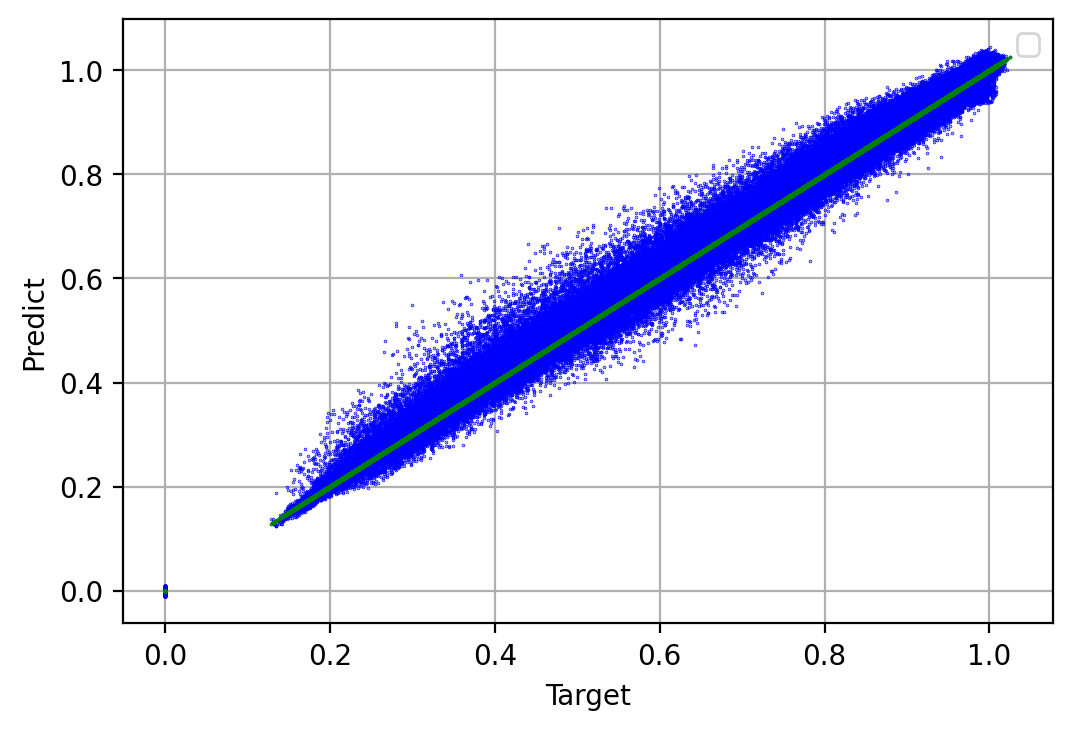

In [37]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["figure.dpi"]     = 200

plt.figure(1)
    #plt.xscale("")
plt.ylabel("Predict")
plt.xlabel("Target")        
#plt.plot(Test_500[:,:], Pred_500[:,:], 'r.', ms = 1)




plt.plot(Test_500[:,:], Pred_500[:,:], 'b.', ms = 0.5,)
#plt.plot(Test_500[5,5], Pred_500[5,5], 'b.', ms = 1, label='GeometricMeanRandom B')




plt.plot(Test_500[:,:], Test_500[:,:], 'g.', ms = 0.75)

#plt.plot(Test_500[205:,:], Test_500[205:,:], 'g.', ms = 0.75)


plt.legend(loc='best')
#plt.title(str(Sequence_Bool[rowIndex][:]))
plt.grid()

plt.savefig("./complete_128x4_64.png",dpi=300, bbox_inches='tight' )

In [74]:
np.sqrt(0.00045008587767370045)

0.021215227495214387

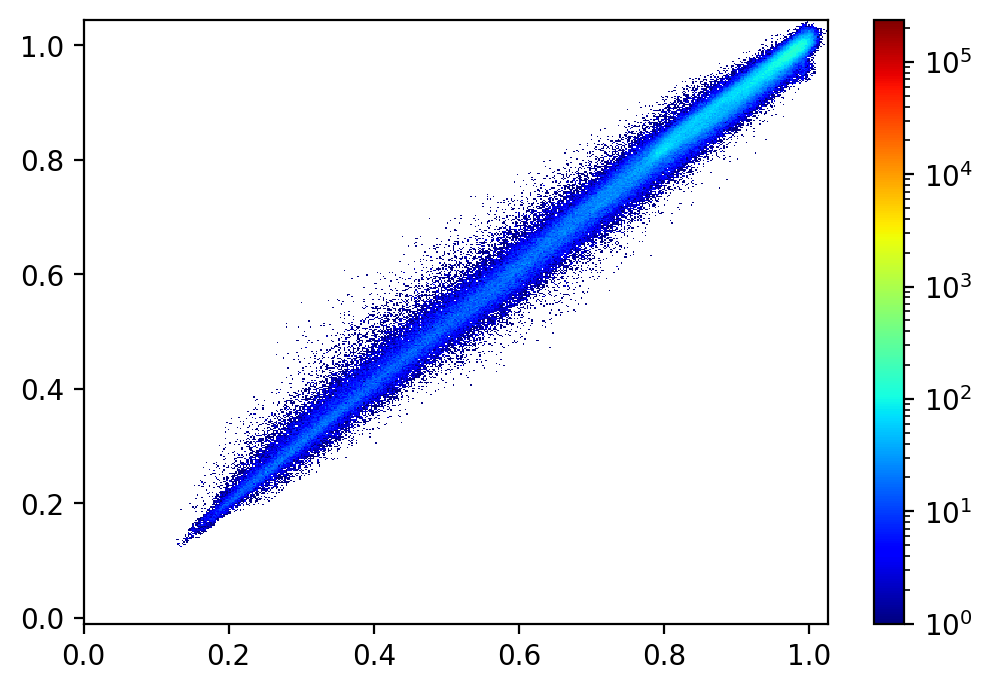

In [38]:
plt.hist2d(Test_500.reshape(605*900), Pred_500.reshape(605*900), bins=(500, 500), cmap=plt.cm.jet, norm = colors.LogNorm()  )
plt.colorbar()
plt.show
plt.savefig("./2D_Hist_s50.png",dpi=300, bbox_inches='tight' )


#plt.hist2d(x, y, bins=(300, 300), cmap=plt.cm.jet)
#plt.show()